In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, accuracy_score,recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
merged = pd.read_pickle('../dataset/rna-dnam-merge-2class.pkl')
merged

,sample,one_year_r,cg07881041,cg03513874,cg05451842,cg14797042,cg09838562,cg25458538,cg09261072,cg02404579,...,RF00019,AC006380.1,AGR3,RHBDF1P1,GAPDHP67,SKOR2,AC007064.2,MAB21L4,AC006328.1,AL080248.1
0,n366,1,0.967472,0.959952,0.015717,0.986284,0.019557,0.975208,0.686440,0.891883,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
1,n350,1,0.958675,0.969429,0.012830,0.990860,0.009751,0.975918,0.718653,0.901881,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
2,n355,1,0.958330,0.970704,0.017563,0.988419,0.016279,0.971972,0.691018,0.932405,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000002,0.0
3,n383,1,0.956485,0.971786,0.017026,0.982214,0.014227,0.967617,0.666653,0.900854,...,0.00000,0.0,0.0,0.000000e+00,0.0,1.800115e-08,0.0,0.0,0.000000,0.0
4,n385,1,0.965497,0.968289,0.015491,0.990840,0.023649,0.968319,0.712608,0.914887,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
5,n391,1,0.968635,0.972431,0.013156,0.991982,0.019634,0.967912,0.697609,0.879218,...,0.00002,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
6,n402,1,0.965005,0.969829,0.017982,0.989836,0.014831,0.965697,0.677621,0.932239,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
7,n454,1,0.969442,0.975114,0.023596,0.989346,0.021281,0.964025,0.701718,0.881712,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
8,n462,1,0.961427,0.974728,0.010431,0.993891,0.017303,0.961082,0.661728,0.927930,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0
9,n464,1,0.967643,0.976058,0.011288,0.985628,0.012182,0.968428,0.702195,0.899545,...,0.00000,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000,0.0


In [3]:
merged = merged.fillna(0)
from sklearn.utils import shuffle
shuffled = shuffle(merged)
#shuffled.to_pickle('../dataset/rna-dnam-merge_shuffled_2class.pkl')
shuffled = pd.read_pickle('../dataset/rna-dnam-merge_shuffled_2class.pkl')

labels = np.array(shuffled['one_year_r'])
features = np.array(shuffled.drop(columns=['one_year_r','sample']))
print(labels.shape)
print(features.shape)

X = features
Y = labels
print(Y)

(31,)
(31, 769880)
[0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1]


(mean) ACC:  0.5523809523809523 Precision:  0.4333333333333333 Recall:  0.4 F1:  0.3666666666666666 AUC:  0.6294784580498866
(std) ACC:  0.1431742512225991 Precision:  0.38873012632302 Recall:  0.38873012632302006 F1:  0.30550504633038933 AUC:  0.10992097113850008


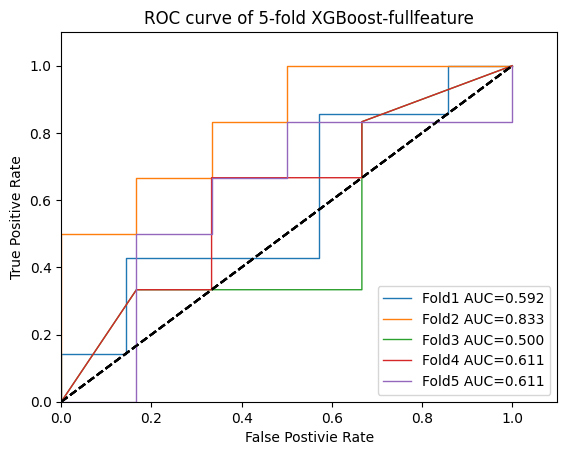

In [4]:
import xgboost as xgb
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=Y
)

# 5-fold
model_name = 'XGBoost'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    #clf = xgb.XGBClassifier(n_jobs=-1,n_estimators=15,max_depth=6)
    clf = xgb.XGBClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name + '-fullfeature')
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

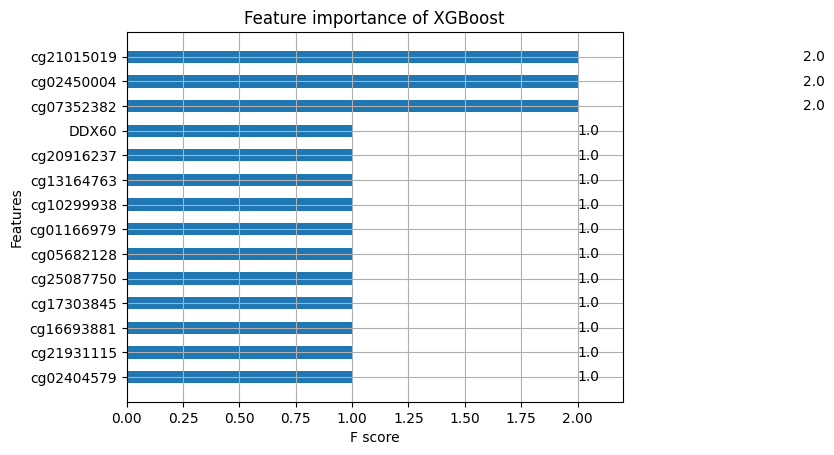

In [5]:
## feature importance
import matplotlib.pyplot as plt
%matplotlib inline

# xgboost
model_name='XGBoost'

import xgboost
clf = xgb.XGBClassifier(n_jobs=-1)
clf.fit(X, Y)

feature_names = merged.drop(columns=['one_year_r','sample']).columns.values.tolist()
clf.get_booster().feature_names = feature_names
xgboost.plot_importance(clf, height=0.5, max_num_features=30)
plt.title('Feature importance of '  + model_name)
plt.savefig('../images/rna-dnam-merge/feature_' + model_name,dpi=300, bbox_inches = 'tight')
plt.show()

In [6]:
# 5-feature
feature5 = shuffled[['cg21015019','cg02450004','cg07352382','DDX60','cg20916237','one_year_r']]
feature5

y5 = np.array(feature5['one_year_r'])
x5 = np.array(feature5.drop(columns=['one_year_r']))
print(y5)

[0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1]


(mean) ACC:  0.9 Precision:  1.0 Recall:  0.8 F1:  0.86 AUC:  0.888888888888889
(std) ACC:  0.13333333333333336 Precision:  0.0 Recall:  0.26666666666666666 F1:  0.19595917942265426 AUC:  0.17213259316477408


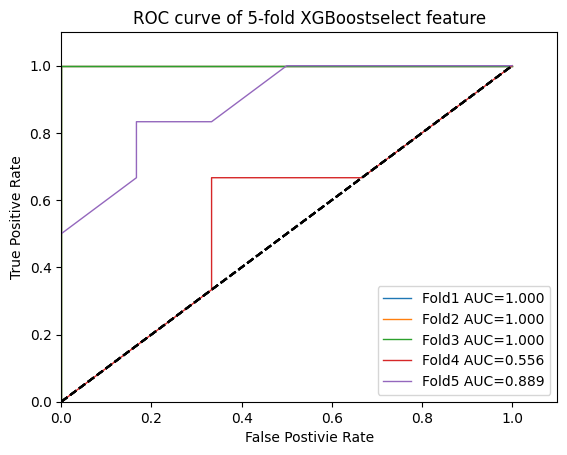

In [7]:
import xgboost as xgb

# 5-fold
model_name = 'XGBoost'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(x5):
    train_x,test_x = x5[train_index], x5[valid_index]
    train_y,test_y = y5[train_index], y5[valid_index]
    #clf = xgb.XGBClassifier(n_jobs=-1,n_estimators=15,max_depth=6)
    clf = xgb.XGBClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name + 'select feature')
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-5feature.png',dpi=300)
plt.show()

(mean) ACC:  0.6095238095238095 Precision:  0.0 Recall:  0.0 F1:  0.0 AUC:  0.6095238095238095
(std) ACC:  0.09110060223670947 Precision:  0.0 Recall:  0.0 F1:  0.0 AUC:  0.0911006022367095


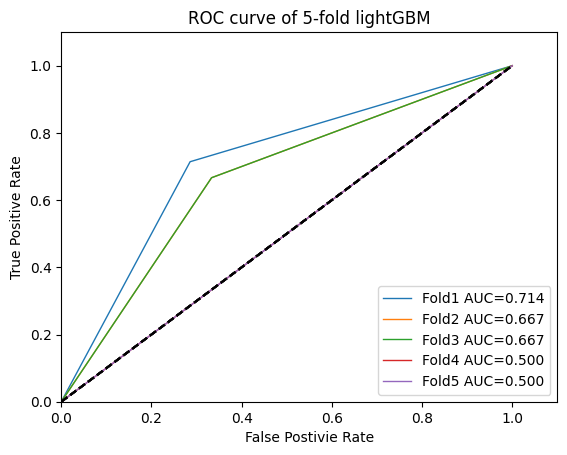

In [8]:
import lightgbm as lgb

# 5-fold
model_name = 'lightGBM'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = lgb.LGBMClassifier(n_jobs=-1)
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

(mean) ACC:  0.4904761904761904 Precision:  0.3 Recall:  0.13333333333333333 F1:  0.18 AUC:  0.5812925170068027
(std) ACC:  0.16049809091764491 Precision:  0.4 Recall:  0.1632993161855452 F1:  0.22271057451320087 AUC:  0.18688150527568054


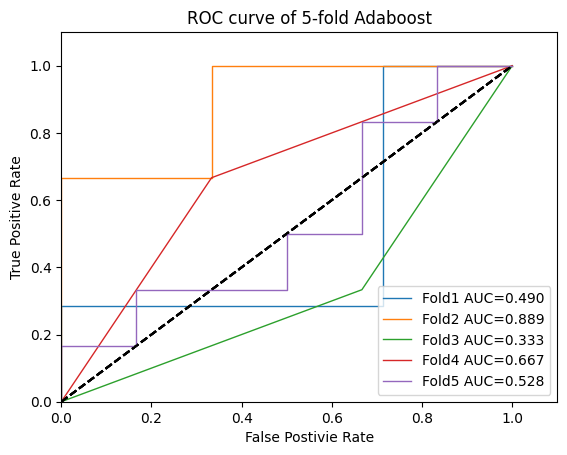

In [9]:
from sklearn.ensemble import AdaBoostClassifier

# 5-fold
model_name = 'Adaboost'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = AdaBoostClassifier()
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

(mean) ACC:  0.6476190476190475 Precision:  0.4666666666666666 Recall:  0.26666666666666666 F1:  0.31333333333333335 AUC:  0.7013605442176871
(std) ACC:  0.1120819266279983 Precision:  0.45215533220835125 Recall:  0.2260776661041756 F1:  0.26964997888208914 AUC:  0.05308423440465687


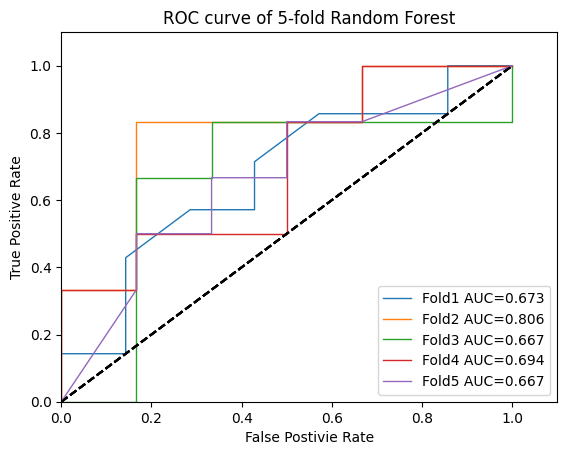

In [10]:
from sklearn.ensemble import RandomForestClassifier

# 5-fold
model_name = 'Random Forest'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = RandomForestClassifier()
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

(mean) ACC:  0.5809523809523809 Precision:  0.4666666666666666 Recall:  0.3 F1:  0.34 AUC:  0.5809523809523809
(std) ACC:  0.16673468000011046 Precision:  0.45215533220835125 Recall:  0.26666666666666666 F1:  0.30724582991474436 AUC:  0.16673468000011046


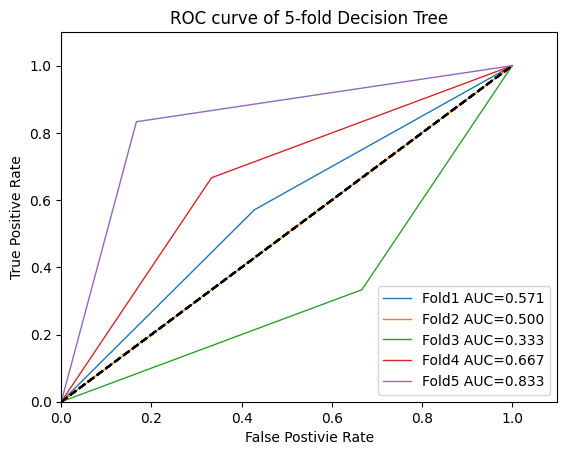

In [11]:
from sklearn.tree import DecisionTreeClassifier

# 5-fold
model_name = 'Decision Tree'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = DecisionTreeClassifier()
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

(mean) ACC:  0.7428571428571428 Precision:  0.8 Recall:  0.3333333333333333 F1:  0.4666666666666666 AUC:  0.7428571428571429
(std) ACC:  0.0758922735738535 Precision:  0.4000000000000001 Recall:  0.18257418583505539 F1:  0.24494897427831783 AUC:  0.07589227357385346


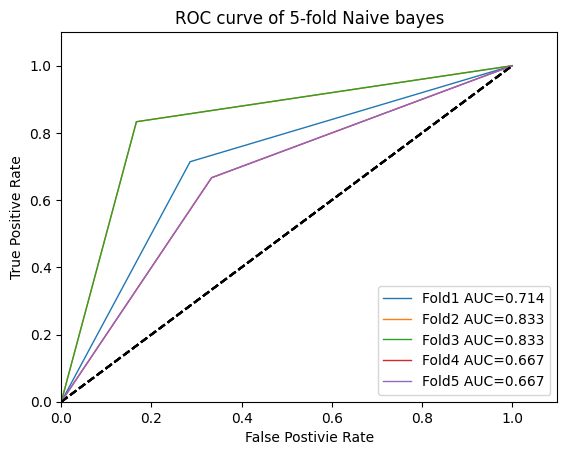

In [12]:
from sklearn.naive_bayes import GaussianNB

# 5-fold
model_name = 'Naive bayes'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = GaussianNB()
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

(mean) ACC:  0.6380952380952382 Precision:  0.36666666666666664 Recall:  0.5 F1:  0.42000000000000004 AUC:  0.6573696145124717
(std) ACC:  0.1994323008702088 Precision:  0.30550504633038933 Recall:  0.4472135954999579 F1:  0.36 AUC:  0.21110051584461184


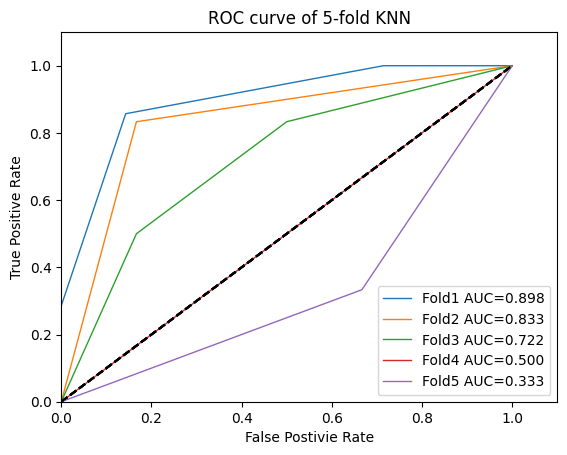

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# 5-fold
model_name = 'KNN'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = KNeighborsClassifier()
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()

(mean) ACC:  0.7380952380952381 Precision:  0.8666666666666668 Recall:  0.5 F1:  0.6066666666666667 AUC:  0.7939909297052155
(std) ACC:  0.13718914562750414 Precision:  0.26666666666666666 Recall:  0.10540925533894598 F1:  0.14047538337136983 AUC:  0.1120125174164922


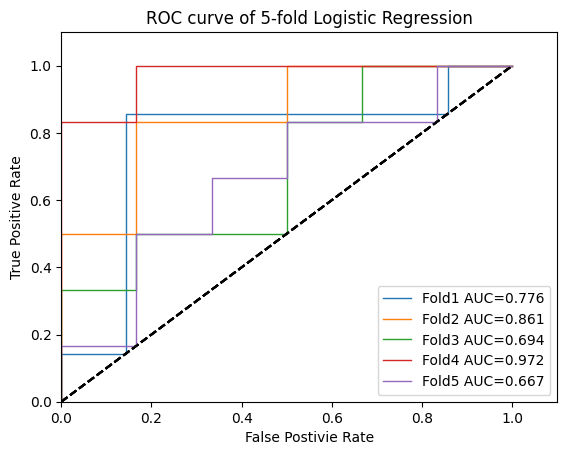

In [14]:
from sklearn.linear_model import LogisticRegression

# 5-fold
model_name = 'Logistic Regression'
cv_result = []
cv_label = []
cv = KFold(n_splits=5)
for train_index, valid_index in cv.split(X):
    train_x,test_x = X[train_index], X[valid_index]
    train_y,test_y = Y[train_index], Y[valid_index]
    clf = LogisticRegression()
    clf.fit(train_x, train_y)
    result = clf.predict_proba(test_x)
    cv_result.append(result)
    cv_label.append(test_y)
#print(cv_result)
#print(cv_label)

acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []

for i in range(5): # 5-fold evaluation
    y_score = cv_result[i].argmax(axis=1)                                   
    y_score_pro = cv_result[i] # (.., 2)
    y_one_hot = to_categorical(cv_label[i])
    y_score_one_hot = to_categorical(y_score)

    acc_list.append(accuracy_score(cv_label[i], y_score))
    precision_list.append(precision_score(cv_label[i], y_score))
    recall_list.append(recall_score(cv_label[i], y_score))
    f1_list.append(f1_score(cv_label[i], y_score))

    fpr, tpr, thresholds = roc_curve(y_one_hot.ravel(),y_score_pro.ravel())   
    auc_list.append(auc(fpr, tpr))

    plt.plot(fpr, tpr, linewidth = 1,label='Fold' + str(i+1) + ' AUC=%.3f' % auc(fpr, tpr))
    plt.plot([0,1],[0,1], 'k--')

print('(mean) ACC: ', np.mean(acc_list), 'Precision: ', np.mean(precision_list), 'Recall: ', np.mean(recall_list), 'F1: ', np.mean(f1_list), 'AUC: ', np.mean(auc_list))
print('(std) ACC: ', np.std(acc_list), 'Precision: ', np.std(precision_list), 'Recall: ', np.std(recall_list), 'F1: ', np.std(f1_list), 'AUC: ', np.std(auc_list))
plt.axis([0,1.1,0,1.1])
plt.xlabel('False Postivie Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('ROC curve of 5-fold '  + model_name)
plt.savefig('../images/rna-dnam-merge/roc-5fold-' + model_name + '-fullfeature.png',dpi=300)
plt.show()